In [1]:
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import os
import gc

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing import image

In [2]:
# remove unnecessary variables
def clean_up(vars_):
    for var in vars_:
        del var 
    print(gc.collect())

In [3]:
train_dir = '/Users/arencarpenter/Desktop/Covid_CT_Classification/Split/train'
val_dir = '/Users/arencarpenter/Desktop/Covid_CT_Classification/Split/validation'
test_dir = '/Users/arencarpenter/Desktop/Covid_CT_Classification/Split/test'

In [4]:
# pull a few images from training
not_covid_imgs = [fn for fn in os.listdir(f'{train_dir}/not_covid') if fn.endswith('.png')]
covid_imgs = [fn for fn in os.listdir(f'{train_dir}/covid') if fn.endswith('.png')]

select_not_covid = np.random.choice(not_covid_imgs, 3, replace = False)
select_covid = np.random.choice(covid_imgs, 3, replace = False)

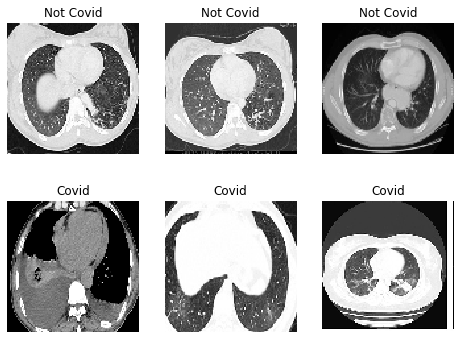

In [7]:
fig = plt.figure(figsize = (8,6))

for i in range(6):
    if i < 3:
        fp = f'{train_dir}/not_covid/{select_not_covid[i]}'
        label = 'Not Covid'
    else:
        fp = f'{train_dir}/covid/{select_covid[i-3]}'
        label = 'Covid'
    ax = fig.add_subplot(2, 3, i+1)
    fn = image.load_img(fp, target_size = (100,100),
                        color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

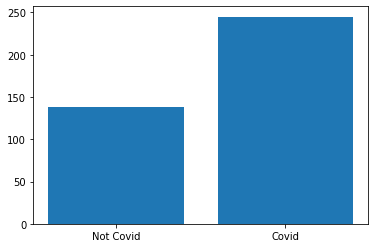

In [8]:
plt.bar(['Not Covid', 'Covid'], [len(not_covid_imgs), len(covid_imgs)], )
plt.show()

In [9]:
def img2np(pwd, fn_list, size = (64, 64)):
    for fn in fn_list:
        fp = pwd + fn
        current_image = image.load_img(fp, 
                                       target_size = size, 
                                       color_mode = 'grayscale')
        img_ts = image.img_to_array(current_image)
        img_ts = [img_ts.ravel()]
        try:
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            full_mat = img_ts
    return full_mat

In [10]:
not_covid_images = img2np(f'{train_dir}/not_covid/', not_covid_imgs)
covid_images = img2np(f'{train_dir}/covid/', covid_imgs)

In [11]:
def find_mean_img(image_vecs, title, size = (64, 64)):
    mean_img = np.mean(image_vecs, axis = 0)
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

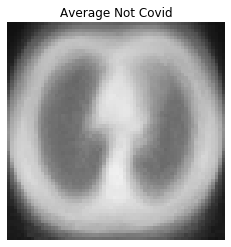

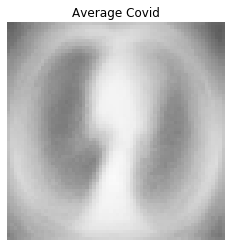

In [12]:
not_covid_mean = find_mean_img(not_covid_images, 'Not Covid')
covid_mean = find_mean_img(covid_images, 'Covid')

In [16]:
def find_std_img(image_vecs, title, size = (64, 64)):
    std_img = np.std(image_vecs, axis = 0)
    std_img = std_img.reshape(size)
    std_img = np.expand_dims(std_img, axis = 0)
    plt.imshow(std_img[0], cmap='Greys_r')
    plt.title(f'Standard Deviation {title}')
    plt.axis('off')
    plt.show()
    return std_img

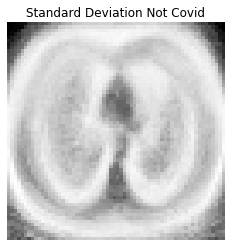

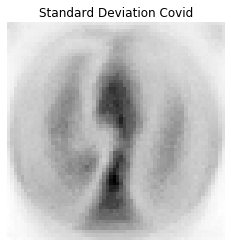

In [17]:
not_covid_std = find_std_img(not_covid_images, 'Not Covid')
covid_std = find_std_img(covid_images, 'Covid')